### Rotating


In [89]:
from moviepy.editor import *
#your_video = "../dataset/good_sync/perry-all-2/P104_2020-12-06_121257717.mp4"
video_sources = ["first_video.mp4", "second_video.mp4","third_video.mp4",
                 "fourth_video.mp4", "sixth_video.mp4",
                 "seventh_video.mp4", "eight_video.mp4", "ninth_video.mp4"]
rotated_video_sources = ["rotated_" + source for source in video_sources]
for video_source, rotated_source in zip(video_sources, rotated_video_sources):
    clip = VideoFileClip(video_source)
    clip = clip.rotate(90)
    clip.write_videofile(rotated_source)


chunk:   9%|▉         | 84/902 [00:00<00:00, 839.20it/s, now=None]

Moviepy - Building video rotated_first_video.mp4.
MoviePy - Writing audio in rotated_first_videoTEMP_MPY_wvf_snd.mp3


t:   0%|          | 0/1023 [00:00<?, ?it/s, now=None]              

MoviePy - Done.
Moviepy - Writing video rotated_first_video.mp4



Moviepy - Done !
Moviepy - video ready rotated_first_video.mp4


chunk:  13%|█▎        | 102/798 [00:00<00:01, 646.88it/s, now=None]

Moviepy - Building video rotated_second_video.mp4.
MoviePy - Writing audio in rotated_second_videoTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/1085 [00:00<01:05, 16.51it/s, now=None]      

MoviePy - Done.
Moviepy - Writing video rotated_second_video.mp4



Moviepy - Done !
Moviepy - video ready rotated_second_video.mp4


chunk:  11%|█         | 102/948 [00:00<00:01, 676.91it/s, now=None]

Moviepy - Building video rotated_third_video.mp4.
MoviePy - Writing audio in rotated_third_videoTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/1074 [00:00<00:59, 18.06it/s, now=None]      

MoviePy - Done.
Moviepy - Writing video rotated_third_video.mp4



Moviepy - Done !
Moviepy - video ready rotated_third_video.mp4


chunk:   9%|▉         | 96/1026 [00:00<00:00, 957.67it/s, now=None]

Moviepy - Building video rotated_fourth_video.mp4.
MoviePy - Writing audio in rotated_fourth_videoTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/1163 [00:00<01:06, 17.51it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video rotated_fourth_video.mp4



Moviepy - Done !
Moviepy - video ready rotated_fourth_video.mp4


chunk:   8%|▊         | 101/1200 [00:00<00:01, 1009.87it/s, now=None]

Moviepy - Building video rotated_sixth_video.mp4.
MoviePy - Writing audio in rotated_sixth_videoTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/1632 [00:00<01:42, 15.97it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video rotated_sixth_video.mp4



Moviepy - Done !
Moviepy - video ready rotated_sixth_video.mp4


chunk:   6%|▌         | 56/903 [00:00<00:01, 555.80it/s, now=None]

Moviepy - Building video rotated_seventh_video.mp4.
MoviePy - Writing audio in rotated_seventh_videoTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/1229 [00:00<01:25, 14.31it/s, now=None]      

MoviePy - Done.
Moviepy - Writing video rotated_seventh_video.mp4



Moviepy - Done !
Moviepy - video ready rotated_seventh_video.mp4


chunk:  11%|█         | 102/963 [00:00<00:01, 738.74it/s, now=None]

Moviepy - Building video rotated_eight_video.mp4.
MoviePy - Writing audio in rotated_eight_videoTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/1309 [00:00<01:17, 16.82it/s, now=None]      

MoviePy - Done.
Moviepy - Writing video rotated_eight_video.mp4



Moviepy - Done !
Moviepy - video ready rotated_eight_video.mp4


chunk:  10%|█         | 96/920 [00:00<00:00, 957.03it/s, now=None]

Moviepy - Building video rotated_ninth_video.mp4.
MoviePy - Writing audio in rotated_ninth_videoTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/1251 [00:00<01:20, 15.53it/s, now=None]      

MoviePy - Done.
Moviepy - Writing video rotated_ninth_video.mp4



Moviepy - Done !
Moviepy - video ready rotated_ninth_video.mp4


# Basic engine implementation

#### setup

In [90]:
import face_recognition, PIL.Image, PIL.ImageDraw,math
import numpy as np
import logging
import cv2
import platform
from matplotlib import pyplot as plt
from PIL import Image
import scipy.signal as sig

FORMAT = '[%(asctime)s] [%(levelname)s] [%(funcName)s] [%(lineno)d] : %(message)s'
logging.basicConfig(format=FORMAT, level=logging.INFO)

logging.info("Starting ...")
if platform.system() == "Windows":
    seperator = "\\"
else:
    seperator = "/"

dir = "perry-all-2"
# should be a parameter of the engine
dataset_location = ".." + seperator + "dataset" + seperator + "good_sync" + seperator
specific_dir = dir
#video_location = dataset_location + specific_dir + seperator + "lab1.mp4"
#video_location = "rotated.mp4"

[2021-05-10 01:12:00,413] [INFO] [<module>] [13] : Starting ...


## running evm pre-processing

In [91]:
#%run ./evm_preprocessing.ipynb
# video_location = dataset_location + specific_dir + seperator + "out.avi"
#video_location="out2.avi"

#### Detecting the face landmarks and parsing the ROI

In [92]:
def parse_roi(frame):
    # image = face_recognition.load_image_file(frame) # read image.
    face_locations = face_recognition.face_locations(frame,model = 'hog') # detects all the faces in image
    face_landmarks_list = face_recognition.face_landmarks(image)
    
    # iterate through all the faces.
    for face_location in face_locations:
        img = PIL.Image.fromarray(frame)
        top,right,bottom,left = face_location # extract all face square points.
        diff = math.floor((top - bottom) * 0.15) # 20 percent of the face len (toadd eyebrow top point).
        
        # finding the forehead
        try:
            right_eyebrow_landmarks = np.asarray(face_landmarks_list[0]['right_eyebrow']) # right eyebrow points.
        except:
            return None
        right_eyebrow_landmarks.sort(axis=0)
        rightest_point = right_eyebrow_landmarks[-1] # The most right point of the ROI(according to x).
        top_right_eyebrow = right_eyebrow_landmarks.min(axis = 0)[1]
        try:
            left_eyebrow_landmarks = np.asarray(face_landmarks_list[0]['left_eyebrow'])
        except:
            return None
        left_eyebrow_landmarks.sort(axis=0)
        leftest_point = left_eyebrow_landmarks[0] # the most left point of ROI.(according to x)
        top_left_eyebrow = left_eyebrow_landmarks.min(axis = 0)[1]
        bottom = min(top_right_eyebrow,top_left_eyebrow).item(0) # bottom point of the forehead.
        bottom = bottom - (0.05 * bottom) # improve bottom location by 2 percent.
        forehead = img.crop((leftest_point[0], leftest_point[1]+diff, rightest_point[0],bottom+10)) # adding diff to top to make the forehead bigger.

        # finding the second ROI:
        try:
            upper_mouth = np.asarray(face_landmarks_list[0]['top_lip']) # top_lip landmarks
        except:
            return None
        upper_mouth_min = upper_mouth.min(axis = 0)[1] # The  top - lip upper point.
        try:
            upper_nose = np.asarray(face_landmarks_list[0]['nose_bridge'])
        except:
            return None
        upper_nose_min = upper_nose.min(axis = 0)[1]  # noise bridge upper point.
        upper_nose_min += upper_mouth_min * 0.1 # improving the noise bridge upper point.
        nose_to_upper_lip = img.crop((leftest_point[0], upper_nose_min, rightest_point[0], upper_mouth_min))

        return forehead, nose_to_upper_lip
    return None # in case of which no face was detected

### Check for bad frames
##### R > 95 and G > 40 and B > 20 and R > G and R > B
##### Based on https://arxiv.org/ftp/arxiv/papers/1708/1708.02694.pdf page 5

In [93]:
red_min_val = 95
green_min_val = 40
blue_min_val = 20
red_green_max_diff = 15
def good_frame(blue, green, red):
    if red <= red_min_val:
        logging.warning("bad frame detected, reason: red > red_min_val")
        return False
    if green <= green_min_val:
        logging.warning("bad frame detected, reason: green > green_min_val")
        return False
    if blue <= blue_min_val:
        logging.warning("bad frame detected, reason: blue > blue_min_val")
        return False
    if red <= green:
        logging.warning("bad frame detected, reason: red > green")
        return False
    if red <= blue:
        logging.warning("bad frame detected, reason: red > blue")
        return False
    if abs(red - green) <= red_green_max_diff:
        logging.warning("bad frame detected, reason: abs(red - green) > red_green_max_diff")
        return False

    return True

In [94]:
def get_new_frame(vidcap):
    success, next_image = vidcap.read()
    return success, next_image

#### Plotting RGB arrays results

In [95]:
def plot_result(greens, reds, blues, x_value, title=""):
    logging.info("Plotting results ..." + title)
    plt.figure(figsize=(6, 5))
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.subplot(3, 1, 1)
    plt.plot(x_value, greens, color="green")
    plt.subplot(3, 1, 2)
    plt.plot(x_value, reds, color="red")
    plt.subplot(3, 1, 3)
    plt.plot(x_value, blues, color="blue")
    plt.show()
    logging.info("Showing result")

#### Filtering:

In [96]:
def filter_channel(channel,fs):
    """
    This method apply filter on a channel between 0.75HZ to 4HZ.
    :param channel: Is a signal to apply the filter to.
    :param fs: Is the sampling rate of channel.
    :return: The filtered channel.
    """
    bh, ah = sig.butter(4, 0.75 / (fs / 2), 'highpass')
    bl, al = sig.butter(4, 4 / (fs / 2), 'lowpass')
    try:
        channel = sig.filtfilt(bh, ah, channel) # applying the filter coefficient on the sig
    except:
        return None
    #channel = np.absolute(channel)
    channel_after_filter = sig.filtfilt(bl, al, channel) # applying the filter coefficient on the sig
    return channel_after_filter

#### Getting RGB values from a frame and adding them to arrays

In [97]:
def parse_luminace(red, green, blue):
    luminance_level = 0.2126 * red + 0.7152 * green + 0.0722 * blue
    return luminance_level
def parse_RGB(roi, color_sig):
    """
    Parses an image to its RGB channels
    :param image: the image to be parsed
    :param vidcap:
    :param greens: array containing green channel values
    :param blues: array containing blue channel values
    :param reds: array containing red channel values
    :param frame_number - is the number of the frame of the video.
    :return: a flag indicating if there is a next image, and the next image
    """
#     plt.imshow(roi)
#     plt.show()
    try:
        roi = cv2.cvtColor(roi, cv2.COLOR_RGB2BGR)
    except:
        return False, color_sig
    new_blue,new_green,new_red = cv2.split(roi)
    b_mean,g_mean,r_mean = np.mean(new_blue),np.mean(new_green),np.mean(new_red)
    luminance_level = parse_luminace(r_mean, g_mean, b_mean)
    if good_frame(b_mean,g_mean,r_mean):
        color_channels = roi.reshape(-1, roi.shape[-1])
        avg_color = color_channels.mean(axis=0)
        color_sig.append(avg_color)
        return True, color_sig, luminance_level
    return False, color_sig, luminance_level

In [98]:
def log_video_details(video_source):
    logging.info("\nInformation on video:\t\t\t\t\t\t" + str(video_source) +
                 "\nFPS:\t\t\t\t\t\t" + str(fps) + 
                 "\nRound FPS:\t\t\t\t\t\t" + str(round_fps) + 
                 "\nNumber of frames:\t\t\t\t" + str(number_of_frames) + 
                 "\nNumber of bad frames:\t\t\t\t" + str(bad_frames) + 
                 "\nMax luminanace:\t\t\t\t\t" + str(max_luminance) + 
                 "\nMin luminanace:\t\t\t\t\t" + str(min_luminance) +
                 "\nMax diff of luminanace between adjacent frames:\t" + str(max_diff_luminance_adjacent) +
                 "\nAvg luminanace:\t\t\t\t\t" + str(avg_luminance))

In [99]:
import pandas as pd
def indexes(y, thres=0.3, min_dist=1, thres_abs=False):
    if isinstance(y, np.ndarray) and np.issubdtype(y.dtype, np.unsignedinteger):
        raise ValueError("y must be signed")

    if not thres_abs:
        thres = thres * (np.max(y) - np.min(y)) + np.min(y)

    min_dist = int(min_dist)

    # compute first order difference
    dy = np.diff(y)

    # propagate left and right values successively to fill all plateau pixels (0-value)
    zeros, = np.where(dy == 0)

    # check if the signal is totally flat
    if len(zeros) == len(y) - 1:
        return np.array([])

    if len(zeros):
        # compute first order difference of zero indexes
        zeros_diff = np.diff(zeros)
        # check when zeros are not chained together
        zeros_diff_not_one, = np.add(np.where(zeros_diff != 1), 1)
        # make an array of the chained zero indexes
        zero_plateaus = np.split(zeros, zeros_diff_not_one)

        # fix if leftmost value in dy is zero
        if zero_plateaus[0][0] == 0:
            dy[zero_plateaus[0]] = dy[zero_plateaus[0][-1] + 1]
            zero_plateaus.pop(0)

        # fix if rightmost value of dy is zero
        if len(zero_plateaus) and zero_plateaus[-1][-1] == len(dy) - 1:
            dy[zero_plateaus[-1]] = dy[zero_plateaus[-1][0] - 1]
            zero_plateaus.pop(-1)

        # for each chain of zero indexes
        for plateau in zero_plateaus:
            median = np.median(plateau)
            # set leftmost values to leftmost non zero values
            dy[plateau[plateau < median]] = dy[plateau[0] - 1]
            # set rightmost and middle values to rightmost non zero values
            dy[plateau[plateau >= median]] = dy[plateau[-1] + 1]

    # find the peaks by using the first order difference
    peaks = np.where(
        (np.hstack([dy, 0.0]) < 0.0)
        & (np.hstack([0.0, dy]) > 0.0)
        & (np.greater(y, thres))
    )[0]

    # handle multiple peaks, respecting the minimum distance
    if peaks.size > 1 and min_dist > 1:
        highest = peaks[np.argsort(y[peaks])][::-1]
        rem = np.ones(y.size, dtype=bool)
        rem[peaks] = False

        for peak in highest:
            if not rem[peak]:
                sl = slice(max(0, peak - min_dist), peak + min_dist + 1)
                rem[sl] = True
                rem[peak] = False

        peaks = np.arange(y.size)[~rem]

    return peaks

def print_results(window_sig, window, xlabel, ylabel, change_range, title):
    fig = plt.figure()
    fig.suptitle(title)
    ax = fig.subplots()
    while len(window_sig) > len(window):
        window_sig = window_sig[:-1]
    ax.plot(window_sig,window,color ='green')
    if change_range:
        plt.xlim([0, 5])

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xscale('linear')
    ax.spines['bottom'].set_color('red')
    ax.spines['left'].set_color('red')
    ax.xaxis.label.set_color('red')
    ax.yaxis.label.set_color('red')
    ax.tick_params(axis='x', colors='red')
    ax.tick_params(axis='y', colors='red')
    plt.show()

import scipy
def find_peaks_with_scipy(window_sig, window, round_fps, hr):
    peaks, _ = scipy.signal.find_peaks(window, distance=round_fps)
    plt.plot(window_sig,window,'-go',markerfacecolor='red',markevery=peaks)
    plt.title("Peaks with scipy")
    plt.show()
    print("Peaks vector with scipy: " + str(peaks) + " num of peaks: " + str(len(peaks)))

def print_peaks(window_sig, window):
    while len(window_sig) > len(window):
        window_sig = window_sig[:-1]
        
    peaks = indexes(window,min_dist=20)
    plt.plot(window_sig,window,'-go',markerfacecolor='red',markevery=peaks)
    plt.title("Peaks with implemented function")
    plt.show()
    print("Peaks vector by implemented function: " + str(window_sig[peaks]) + " num of peaks: " + str(len(window_sig[peaks])))
    #print(window_sig)
    #test_peaks = find_peaks(window_sig)
    #plt.plot(window_sig,window,'-go',markerfacecolor='red',markevery=test_peaks)
    #np.savetxt("time_of_peaks.csv", x[peaks], delimiter=",")
    
def find_hr_in_window(green, window_start, round_fps, window_id, window_size):
    
    round_fps = int(round_fps)
    if window_start + round_fps * window_size > len(green):
        window = green[window_start : ]
    else:
        window = green[window_start : window_start + round_fps * window_size]
    window_sig = np.arange(window.size/round_fps,step= (1/round_fps))
    
    print_results(window_sig, window, 'X-axis', 'Y-axis', False, "Green signal")

    window = window - np.mean(window)
    window = window / np.std(window)
    print_results(window_sig, window, 'X-axis', 'Y-axis', False, "Green signal normalized")
    
    g = filter_channel(window,round_fps)
    if g is None:
        return
    from skimage.restoration import denoise_wavelet
    g = denoise_wavelet(g,wavelet='sym2',wavelet_levels = 4)
    print_peaks(window_sig, g)
    print_results(window_sig, window, 'X-axis', 'Y-axis', False, "")

    f, Pxx_den = sig.periodogram(g, round_fps)
    
    print_results(f, Pxx_den, 'Frequency [Hz]', 'PSD [V**2/Hz]', True, "PSD by Frequency")
    # plt.semilogy(f, Pxx_den)
    # plt.ylim([1e-7, 1e2])
    # plt.xlabel('frequency [Hz]')
    # plt.ylabel('PSD [V**2/Hz]')
    # plt.show()


    max_val = Pxx_den.argmax()
    logging.info("Window " + str(window_id) +
                 ":\nHighest freq:" + str(f[max_val]) + "\nHeart rate: " + str(f[max_val]*60))
    
    find_peaks_with_scipy(window_sig, g,round_fps, f[max_val]*60)

In [100]:
def detect_hr(video_source):
    logging.info("\n=======================\n" + video_source + "\n=======================\n")
    color_sig_array = np.asarray(color_sig)
    red = color_sig_array[:,0]
    green = color_sig_array[:,1]
    blue = color_sig_array[:,2]

    window_start = 0
    window_size = 30
    window_id = 0
    limit = good_frame_number - int(round_fps) * window_size
    while window_start < limit :
        find_hr_in_window(green, window_start, round_fps, window_id, window_size)
        window_start += int(round_fps) * window_size
        window_id += 1
    if window_start < good_frame_number:
        find_hr_in_window(green, window_start, round_fps, window_id, good_frame_number - window_start)

#### Main loop - going over all the frames of the video

[2021-05-10 01:12:02,271] [INFO] [<module>] [7] : Working on video rotated_first_video.mp4
[2021-05-10 01:12:04,147] [INFO] [<module>] [13] : Parsing images ...
[2021-05-10 01:12:49,612] [INFO] [<module>] [28] : Parsing frame 200/1023.0
[2021-05-10 01:16:22,057] [INFO] [<module>] [28] : Parsing frame 300/1023.0
[2021-05-10 01:20:11,360] [INFO] [<module>] [28] : Parsing frame 400/1023.0
[2021-05-10 01:24:00,810] [INFO] [<module>] [28] : Parsing frame 500/1023.0
[2021-05-10 01:27:43,325] [INFO] [<module>] [28] : Parsing frame 600/1023.0
[2021-05-10 01:31:13,966] [INFO] [<module>] [28] : Parsing frame 700/1023.0
[2021-05-10 01:34:43,882] [INFO] [<module>] [28] : Parsing frame 800/1023.0
[2021-05-10 01:38:13,549] [INFO] [<module>] [28] : Parsing frame 900/1023.0
[2021-05-10 01:41:43,051] [INFO] [<module>] [28] : Parsing frame 1000/1023.0
[2021-05-10 01:42:33,294] [INFO] [log_video_details] [2] : 
Information on video:						rotated_first_video.mp4
FPS:						25.0
Round FPS:						25.0
Number 

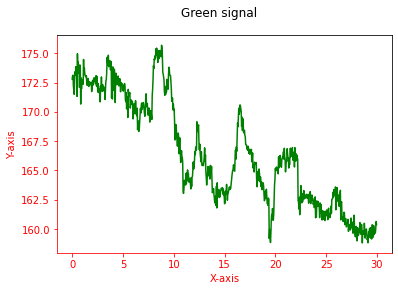

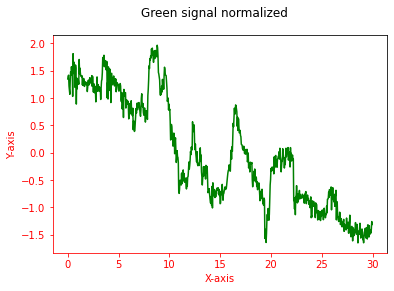

Peaks vector by implemented function: [ 0.6   1.52  2.36  3.48  5.16  6.2   8.04  9.64 10.8  12.36 13.64 15.16
 16.52 18.04 19.08 20.04 21.16 22.12 23.08 24.2  25.2  26.36 27.72 28.76] num of peaks: 24


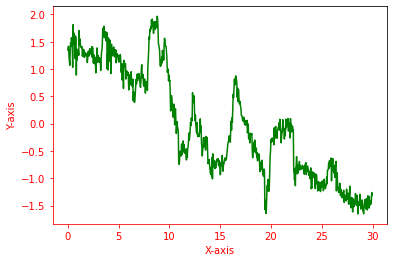

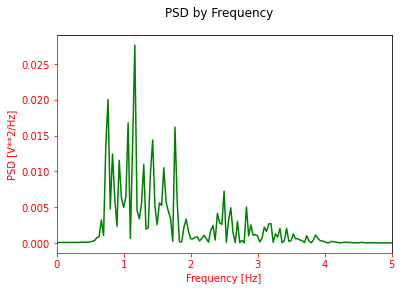

[2021-05-10 01:42:34,841] [INFO] [find_hr_in_window] [147] : Window 0:
Highest freq:1.1666666666666667
Heart rate: 70.0


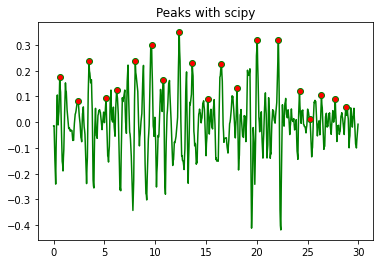

Peaks vector with scipy: [ 15  59  87 129 155 201 241 270 309 341 379 413 451 501 553 605 630 659
 693 719] num of peaks: 20


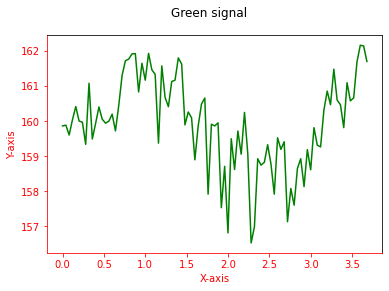

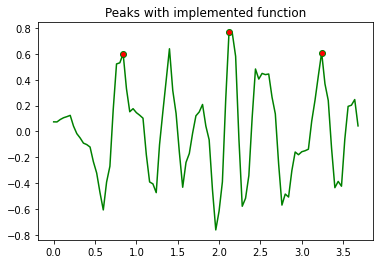

Peaks vector by implemented function: [0.84 2.12 3.24] num of peaks: 3


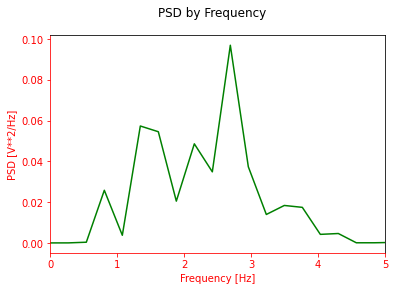

[2021-05-10 01:42:36,856] [INFO] [find_hr_in_window] [147] : Window 1:
Highest freq:2.6881720430107525
Heart rate: 161.29032258064515


[2021-05-10 01:42:37,044] [INFO] [<module>] [7] : Working on video rotated_second_video.mp4
[2021-05-10 01:42:37,156] [INFO] [<module>] [13] : Parsing images ...


Peaks vector with scipy: [21 53 81] num of peaks: 3


[2021-05-10 01:43:24,833] [INFO] [<module>] [28] : Parsing frame 200/1085.0
[2021-05-10 01:47:15,312] [INFO] [<module>] [28] : Parsing frame 300/1085.0
[2021-05-10 01:51:05,776] [INFO] [<module>] [28] : Parsing frame 400/1085.0
[2021-05-10 01:54:43,686] [INFO] [<module>] [28] : Parsing frame 500/1085.0
[2021-05-10 01:58:21,742] [INFO] [<module>] [28] : Parsing frame 600/1085.0
[2021-05-10 02:02:11,431] [INFO] [<module>] [28] : Parsing frame 700/1085.0
[2021-05-10 02:06:01,586] [INFO] [<module>] [28] : Parsing frame 800/1085.0
[2021-05-10 02:09:39,287] [INFO] [<module>] [28] : Parsing frame 900/1085.0
[2021-05-10 02:13:10,185] [INFO] [<module>] [28] : Parsing frame 1000/1085.0
[2021-05-10 02:16:08,980] [INFO] [log_video_details] [2] : 
Information on video:						rotated_second_video.mp4
FPS:						30.0
Round FPS:						30.0
Number of frames:				1085.0
Number of bad frames:				0
Max luminanace:					181.90245346247534
Min luminanace:					159.3055480764057
Max diff of luminanace between adja

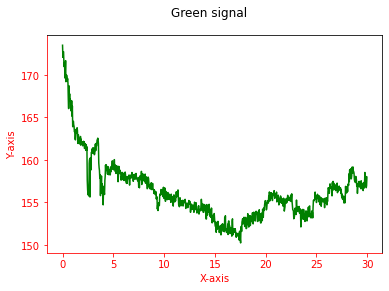

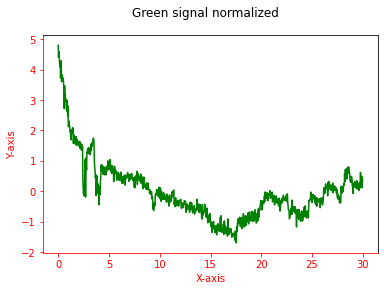

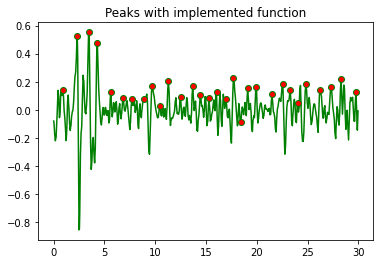

Peaks vector by implemented function: [ 0.9         2.3         3.46666667  4.3         5.63333333  6.83333333
  7.7         8.9         9.7        10.43333333 11.3        12.5
 13.7        14.43333333 15.3        16.03333333 16.96666667 17.7
 18.4        19.1        19.96666667 21.5        22.56666667 23.3
 24.03333333 24.83333333 26.23333333 27.3        28.3        29.76666667] num of peaks: 30


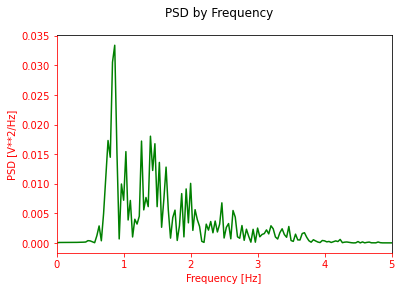

[2021-05-10 02:16:09,741] [INFO] [find_hr_in_window] [147] : Window 0:
Highest freq:0.8666666666666667
Heart rate: 52.0


Peaks vector with scipy: [ 27  69 104 169 205 237 291 339 375 411 449 481 531 565 599 645 677 711
 745 787 819 849 893] num of peaks: 23


[2021-05-10 02:16:10,277] [INFO] [<module>] [7] : Working on video rotated_third_video.mp4
[2021-05-10 02:16:10,404] [INFO] [<module>] [13] : Parsing images ...
[2021-05-10 02:16:58,323] [INFO] [<module>] [28] : Parsing frame 200/1074.0
[2021-05-10 02:20:49,055] [INFO] [<module>] [28] : Parsing frame 300/1074.0
[2021-05-10 02:24:38,686] [INFO] [<module>] [28] : Parsing frame 400/1074.0
[2021-05-10 02:28:17,152] [INFO] [<module>] [28] : Parsing frame 500/1074.0
[2021-05-10 02:31:48,403] [INFO] [<module>] [28] : Parsing frame 600/1074.0
[2021-05-10 02:35:18,782] [INFO] [<module>] [28] : Parsing frame 700/1074.0
[2021-05-10 02:38:49,279] [INFO] [<module>] [28] : Parsing frame 800/1074.0
[2021-05-10 02:42:33,743] [INFO] [<module>] [28] : Parsing frame 900/1074.0
[2021-05-10 02:46:23,207] [INFO] [<module>] [28] : Parsing frame 1000/1074.0
[2021-05-10 02:49:13,292] [INFO] [log_video_details] [2] : 
Information on video:						rotated_third_video.mp4
FPS:						25.0
Round FPS:						25.0
Number 

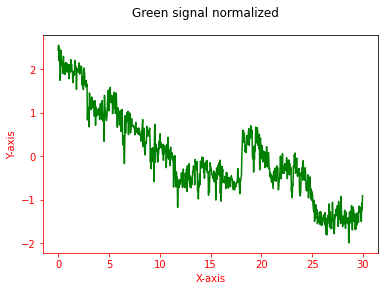

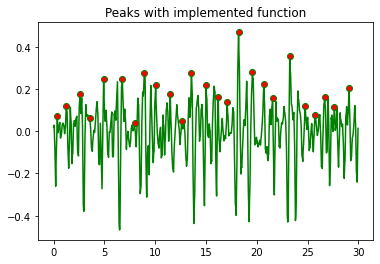

Peaks vector by implemented function: [ 0.36  1.24  2.6   3.56  4.92  6.76  7.96  8.92 10.04 11.48 12.6  13.56
 15.   16.2  17.08 18.2  19.56 20.68 21.56 23.24 24.76 25.72 26.68 27.64
 29.08] num of peaks: 25


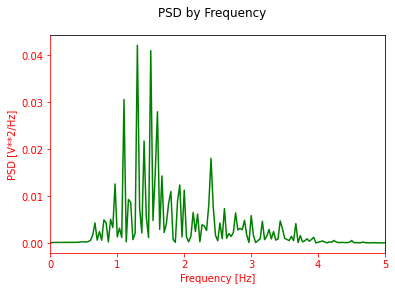

[2021-05-10 02:49:14,092] [INFO] [find_hr_in_window] [147] : Window 0:
Highest freq:1.3
Heart rate: 78.0


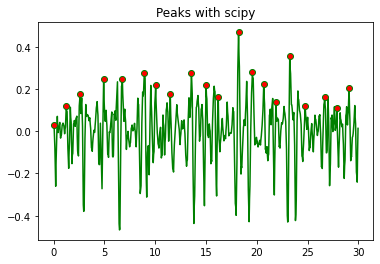

Peaks vector with scipy: [  1  31  65 123 169 223 251 287 339 375 405 455 489 517 547 581 619 667
 697 727] num of peaks: 20


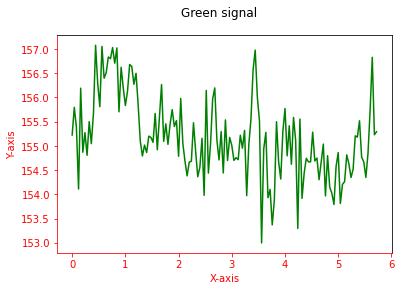

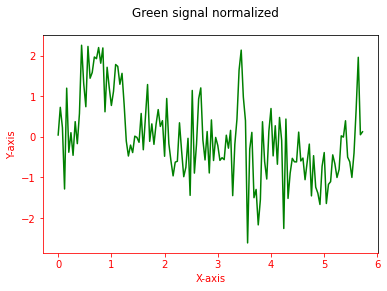

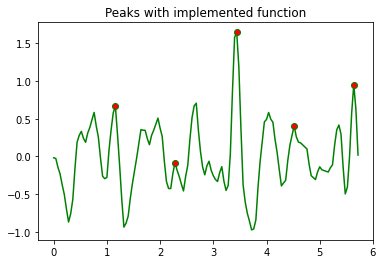

Peaks vector by implemented function: [1.16 2.28 3.44 4.52 5.64] num of peaks: 5


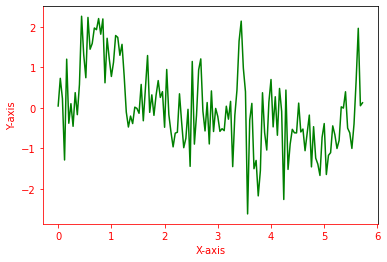

[2021-05-10 02:49:15,145] [INFO] [find_hr_in_window] [147] : Window 1:
Highest freq:1.7361111111111112
Heart rate: 104.16666666666667


[2021-05-10 02:49:15,305] [INFO] [<module>] [7] : Working on video rotated_fourth_video.mp4


Peaks vector with scipy: [ 29  57  86 113 141] num of peaks: 5


[2021-05-10 02:49:15,508] [INFO] [<module>] [13] : Parsing images ...
[2021-05-10 02:50:03,661] [INFO] [<module>] [28] : Parsing frame 200/1163.0
[2021-05-10 02:53:55,235] [INFO] [<module>] [28] : Parsing frame 300/1163.0
[2021-05-10 02:57:44,892] [INFO] [<module>] [28] : Parsing frame 400/1163.0
[2021-05-10 03:01:35,517] [INFO] [<module>] [28] : Parsing frame 500/1163.0
[2021-05-10 03:05:25,504] [INFO] [<module>] [28] : Parsing frame 600/1163.0
[2021-05-10 03:09:09,530] [INFO] [<module>] [28] : Parsing frame 700/1163.0
[2021-05-10 03:12:41,922] [INFO] [<module>] [28] : Parsing frame 800/1163.0
[2021-05-10 03:16:12,871] [INFO] [<module>] [28] : Parsing frame 900/1163.0
[2021-05-10 03:20:03,014] [INFO] [<module>] [28] : Parsing frame 1000/1163.0
[2021-05-10 03:23:53,392] [INFO] [<module>] [28] : Parsing frame 1100/1163.0
[2021-05-10 03:26:17,678] [INFO] [log_video_details] [2] : 
Information on video:						rotated_fourth_video.mp4
FPS:						25.0
Round FPS:						25.0
Number of frames:			

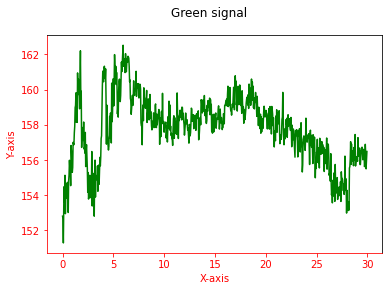

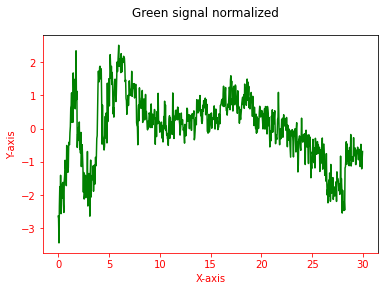

Peaks vector by implemented function: [ 0.2   1.76  2.92  4.12  5.16  6.52  7.64  8.6   9.48 10.52 11.8  12.76
 13.72 15.32 17.   18.68 19.88 21.64 23.   24.76 26.12 27.48 28.36 29.48] num of peaks: 24


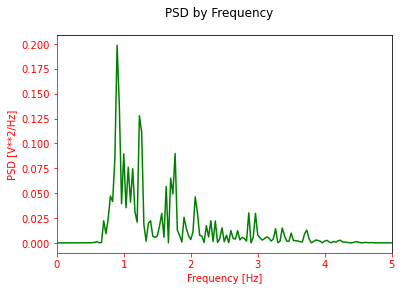

[2021-05-10 03:26:18,419] [INFO] [find_hr_in_window] [147] : Window 0:
Highest freq:0.9
Heart rate: 54.0


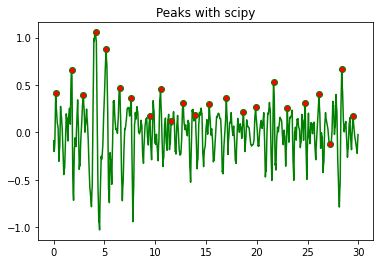

Peaks vector with scipy: [  5  44  73 103 129 163 191 237 263 289 319 349 383 425 467 497 541 575
 619 653 681 709 737] num of peaks: 23


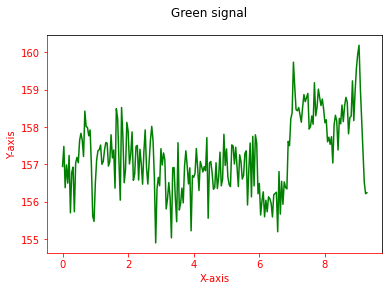

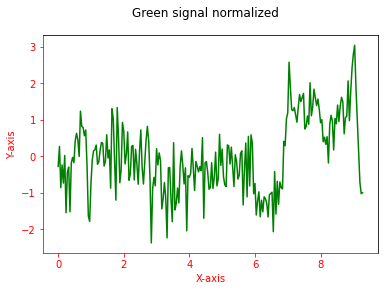

Peaks vector by implemented function: [0.76 1.64 3.08 4.04 4.92 5.88 7.04 7.88 9.  ] num of peaks: 9


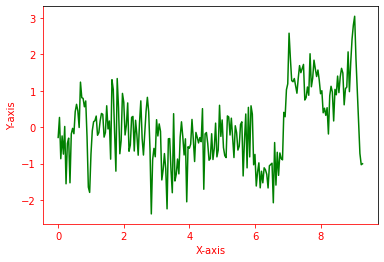

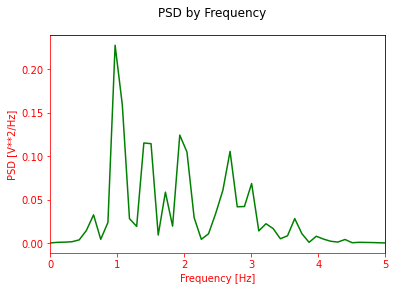

[2021-05-10 03:26:19,393] [INFO] [find_hr_in_window] [147] : Window 1:
Highest freq:0.9656652360515021
Heart rate: 57.93991416309013


[2021-05-10 03:26:19,609] [INFO] [<module>] [7] : Working on video rotated_sixth_video.mp4
[2021-05-10 03:26:19,749] [INFO] [<module>] [13] : Parsing images ...


Peaks vector with scipy: [ 19  51  77 103 147 176 225] num of peaks: 7


[2021-05-10 03:27:03,506] [INFO] [<module>] [28] : Parsing frame 200/1632.0
[2021-05-10 03:30:33,044] [INFO] [<module>] [28] : Parsing frame 300/1632.0
[2021-05-10 03:34:03,251] [INFO] [<module>] [28] : Parsing frame 400/1632.0
[2021-05-10 03:37:32,543] [INFO] [<module>] [28] : Parsing frame 500/1632.0
[2021-05-10 03:41:02,577] [INFO] [<module>] [28] : Parsing frame 600/1632.0
[2021-05-10 03:44:46,347] [INFO] [<module>] [28] : Parsing frame 700/1632.0
[2021-05-10 03:48:37,330] [INFO] [<module>] [28] : Parsing frame 800/1632.0
[2021-05-10 03:52:26,451] [INFO] [<module>] [28] : Parsing frame 900/1632.0
[2021-05-10 03:55:57,671] [INFO] [<module>] [28] : Parsing frame 1000/1632.0
[2021-05-10 03:59:41,732] [INFO] [<module>] [28] : Parsing frame 1100/1632.0
[2021-05-10 04:03:33,571] [INFO] [<module>] [28] : Parsing frame 1200/1632.0
[2021-05-10 04:07:23,227] [INFO] [<module>] [28] : Parsing frame 1300/1632.0
[2021-05-10 04:10:53,647] [INFO] [<module>] [28] : Parsing frame 1400/1632.0
[2021-0

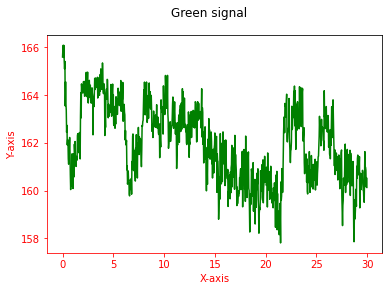

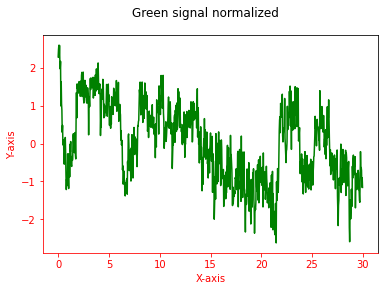

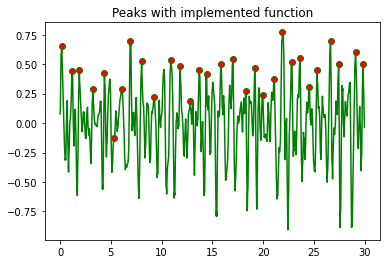

Peaks vector by implemented function: [ 0.16666667  1.16666667  1.9         3.23333333  4.36666667  5.3
  6.1         6.9         8.03333333  9.23333333 10.9        11.83333333
 12.83333333 13.7        14.43333333 15.83333333 17.03333333 18.3
 19.16666667 19.96666667 21.1        21.9        22.83333333 23.63333333
 24.5        25.3        26.63333333 27.43333333 29.1        29.83333333] num of peaks: 30


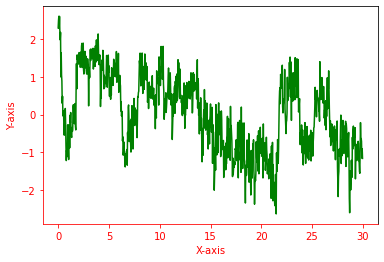

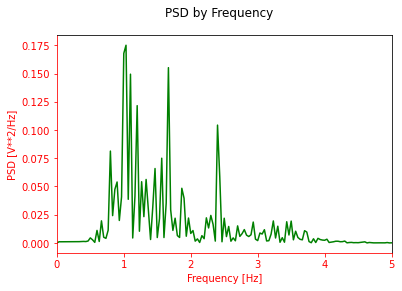

[2021-05-10 04:19:18,405] [INFO] [find_hr_in_window] [147] : Window 0:
Highest freq:1.0333333333333332
Heart rate: 61.99999999999999


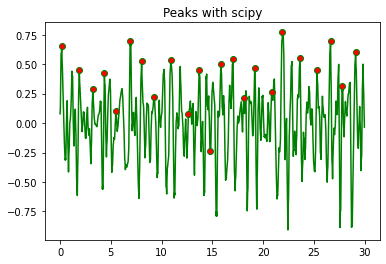

Peaks vector with scipy: [  5  57  97 131 165 207 241 277 327 379 411 444 475 511 543 575 625 657
 709 759 799 833 873] num of peaks: 23


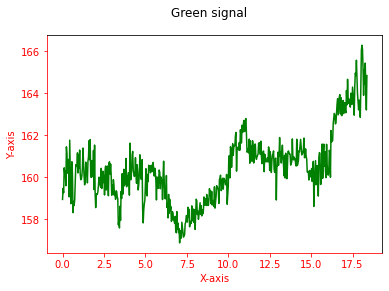

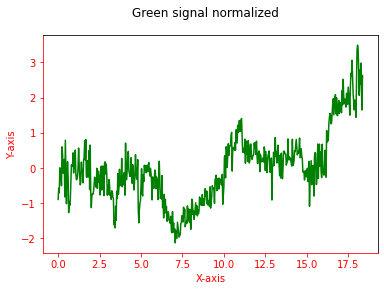

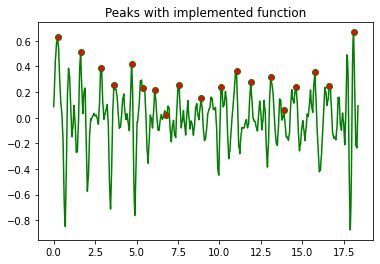

Peaks vector by implemented function: [ 0.23333333  1.63333333  2.83333333  3.63333333  4.7         5.4
  6.1         6.8         7.56666667  8.9        10.1        11.03333333
 11.9        13.1        13.9        14.63333333 15.76666667 16.63333333
 18.1       ] num of peaks: 19


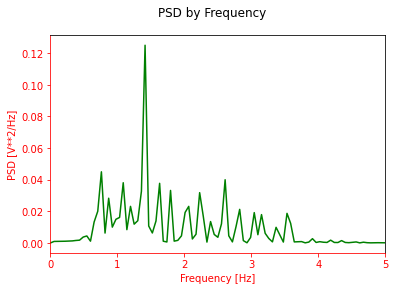

[2021-05-10 04:19:19,467] [INFO] [find_hr_in_window] [147] : Window 1:
Highest freq:1.4130434782608696
Heart rate: 84.78260869565217


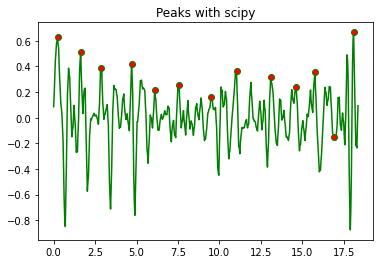

[2021-05-10 04:19:19,728] [INFO] [<module>] [7] : Working on video rotated_seventh_video.mp4
[2021-05-10 04:19:19,905] [INFO] [<module>] [13] : Parsing images ...


Peaks vector with scipy: [  7  49  85 141 183 227 285 331 393 439 473 508 543] num of peaks: 13


[2021-05-10 04:20:07,695] [INFO] [<module>] [28] : Parsing frame 200/1229.0
[2021-05-10 04:23:58,521] [INFO] [<module>] [28] : Parsing frame 300/1229.0
[2021-05-10 04:27:41,416] [INFO] [<module>] [28] : Parsing frame 400/1229.0
[2021-05-10 04:31:23,561] [INFO] [<module>] [28] : Parsing frame 500/1229.0
[2021-05-10 04:35:16,790] [INFO] [<module>] [28] : Parsing frame 600/1229.0
[2021-05-10 04:39:06,260] [INFO] [<module>] [28] : Parsing frame 700/1229.0
[2021-05-10 04:42:39,299] [INFO] [<module>] [28] : Parsing frame 800/1229.0
[2021-05-10 04:46:20,186] [INFO] [<module>] [28] : Parsing frame 900/1229.0
[2021-05-10 04:49:53,006] [INFO] [<module>] [28] : Parsing frame 1000/1229.0
[2021-05-10 04:53:23,673] [INFO] [<module>] [28] : Parsing frame 1100/1229.0
[2021-05-10 04:57:09,843] [INFO] [<module>] [28] : Parsing frame 1200/1229.0
[2021-05-10 04:58:16,386] [INFO] [log_video_details] [2] : 
Information on video:						rotated_seventh_video.mp4
FPS:						30.0
Round FPS:						30.0
Number of fr

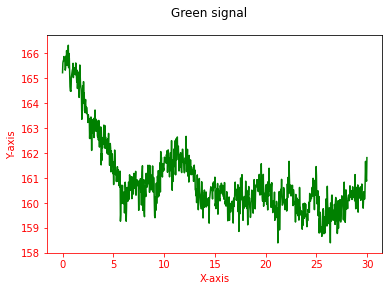

Peaks vector by implemented function: [ 0.1         1.03333333  1.76666667  3.23333333  4.1         5.5
  6.56666667  7.83333333  8.9         9.7        10.43333333 11.3
 12.16666667 12.96666667 14.03333333 14.9        15.63333333 16.96666667
 18.03333333 19.16666667 20.36666667 21.5        22.3        23.36666667
 24.96666667 26.03333333 26.9        28.3        29.43333333] num of peaks: 29


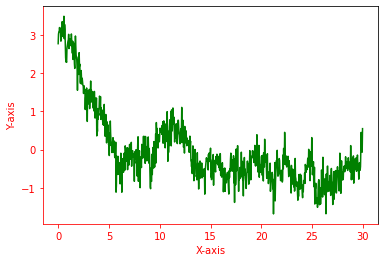

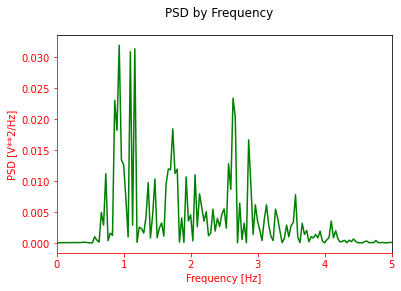

[2021-05-10 04:58:17,263] [INFO] [find_hr_in_window] [147] : Window 0:
Highest freq:0.9333333333333333
Heart rate: 56.0


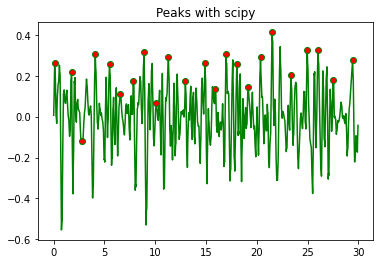

Peaks vector with scipy: [  3  53  83 123 165 197 235 267 303 339 389 447 477 509 541 575 611 645
 701 749 781 825 883] num of peaks: 23


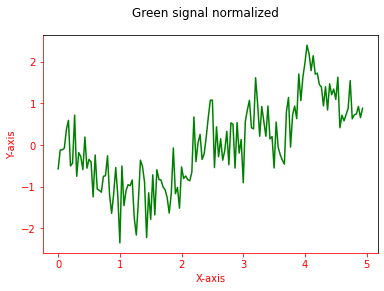

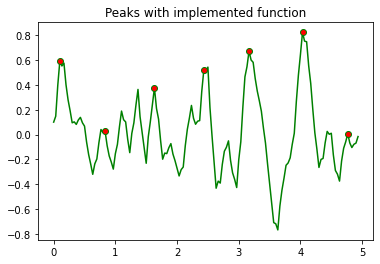

Peaks vector by implemented function: [0.1        0.83333333 1.63333333 2.43333333 3.16666667 4.03333333
 4.76666667] num of peaks: 7


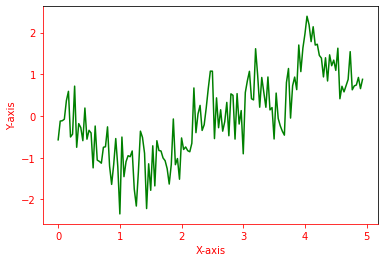

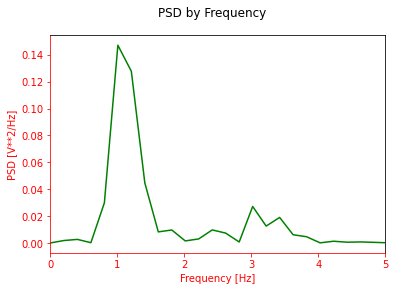

[2021-05-10 04:58:18,230] [INFO] [find_hr_in_window] [147] : Window 1:
Highest freq:1.006711409395973
Heart rate: 60.402684563758385


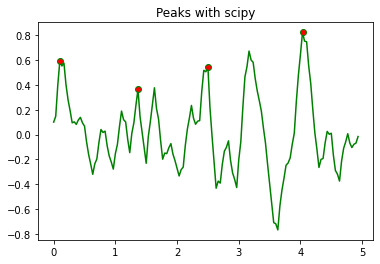

[2021-05-10 04:58:18,482] [INFO] [<module>] [7] : Working on video rotated_eight_video.mp4
[2021-05-10 04:58:18,660] [INFO] [<module>] [13] : Parsing images ...


Peaks vector with scipy: [  3  41  75 121] num of peaks: 4


[2021-05-10 04:59:06,380] [INFO] [<module>] [28] : Parsing frame 200/1309.0
[2021-05-10 05:02:57,636] [INFO] [<module>] [28] : Parsing frame 300/1309.0
[2021-05-10 05:06:36,622] [INFO] [<module>] [28] : Parsing frame 400/1309.0
[2021-05-10 05:10:06,642] [INFO] [<module>] [28] : Parsing frame 500/1309.0
[2021-05-10 05:13:36,631] [INFO] [<module>] [28] : Parsing frame 600/1309.0
[2021-05-10 05:17:12,336] [INFO] [<module>] [28] : Parsing frame 700/1309.0
[2021-05-10 05:21:02,879] [INFO] [<module>] [28] : Parsing frame 800/1309.0
[2021-05-10 05:24:54,398] [INFO] [<module>] [28] : Parsing frame 900/1309.0
[2021-05-10 05:28:37,380] [INFO] [<module>] [28] : Parsing frame 1000/1309.0
[2021-05-10 05:32:25,063] [INFO] [<module>] [28] : Parsing frame 1100/1309.0
[2021-05-10 05:36:15,452] [INFO] [<module>] [28] : Parsing frame 1200/1309.0
[2021-05-10 05:40:02,425] [INFO] [<module>] [28] : Parsing frame 1300/1309.0
[2021-05-10 05:40:21,620] [INFO] [log_video_details] [2] : 
Information on video:			

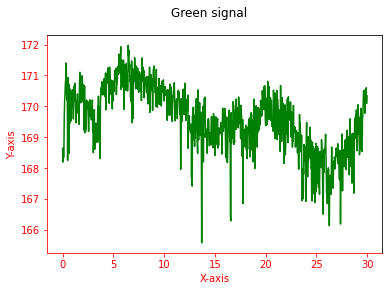

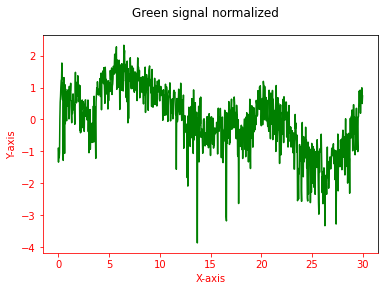

Peaks vector by implemented function: [ 0.3         1.16666667  1.96666667  2.7         3.83333333  4.7
  5.56666667  6.5         7.9         9.03333333  9.9        10.63333333
 11.43333333 12.23333333 13.5        14.36666667 15.16666667 16.36666667
 17.36666667 18.3        19.1        20.23333333 21.63333333 22.43333333
 23.43333333 24.36666667 25.1        25.83333333 27.03333333 28.03333333
 28.83333333 29.63333333] num of peaks: 32


[2021-05-10 05:40:22,379] [INFO] [find_hr_in_window] [147] : Window 0:
Highest freq:2.433333333333333
Heart rate: 146.0


Peaks vector with scipy: [  9  59 115 165 195 237 271 305 343 405 447 491 549 607 643 673 703 741
 775 811 865 897] num of peaks: 22


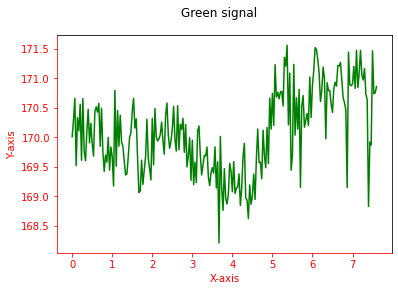

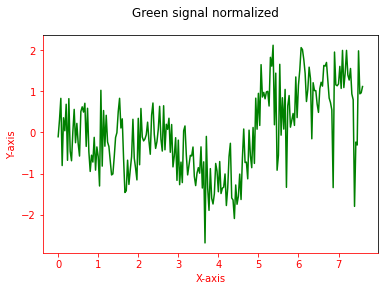

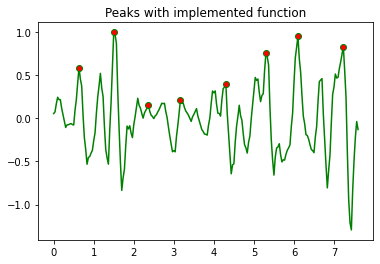

Peaks vector by implemented function: [0.63333333 1.5        2.36666667 3.16666667 4.3        5.3
 6.1        7.23333333] num of peaks: 8


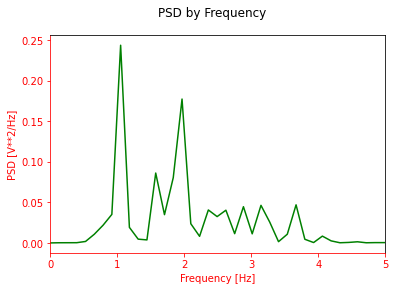

[2021-05-10 05:40:23,262] [INFO] [find_hr_in_window] [147] : Window 1:
Highest freq:1.0480349344978166
Heart rate: 62.88209606986899
[2021-05-10 05:40:23,360] [WARNING] [<module>] [59] : Issue in detecting hr in video
[2021-05-10 05:40:23,361] [INFO] [<module>] [7] : Working on video rotated_ninth_video.mp4
[2021-05-10 05:40:23,407] [INFO] [<module>] [13] : Parsing images ...
[2021-05-10 05:41:07,246] [INFO] [<module>] [28] : Parsing frame 200/1251.0
[2021-05-10 05:44:38,189] [INFO] [<module>] [28] : Parsing frame 300/1251.0
[2021-05-10 05:48:09,335] [INFO] [<module>] [28] : Parsing frame 400/1251.0
[2021-05-10 05:51:37,402] [INFO] [<module>] [28] : Parsing frame 500/1251.0
[2021-05-10 05:55:06,565] [INFO] [<module>] [28] : Parsing frame 600/1251.0
[2021-05-10 05:58:45,668] [INFO] [<module>] [28] : Parsing frame 700/1251.0
[2021-05-10 06:02:35,278] [INFO] [<module>] [28] : Parsing frame 800/1251.0
[2021-05-10 06:06:25,654] [INFO] [<module>] [28] : Parsing frame 900/1251.0
[2021-05-10 0

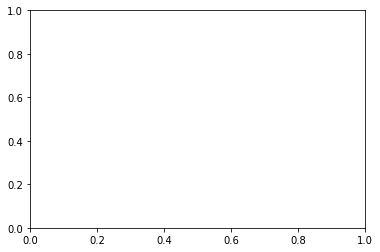

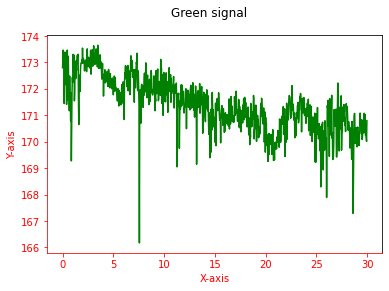

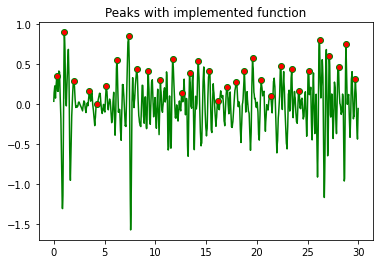

Peaks vector by implemented function: [ 0.3         1.03333333  1.96666667  3.5         4.23333333  5.16666667
  6.23333333  7.36666667  8.16666667  9.3        10.5        11.7
 12.63333333 13.36666667 14.23333333 15.3        16.16666667 17.03333333
 17.96666667 18.76666667 19.56666667 20.43333333 21.36666667 22.36666667
 23.43333333 24.16666667 25.1        26.16666667 27.13333333 28.03333333
 28.76666667 29.7       ] num of peaks: 32


[2021-05-10 06:19:06,479] [INFO] [find_hr_in_window] [147] : Window 0:
Highest freq:1.3
Heart rate: 78.0


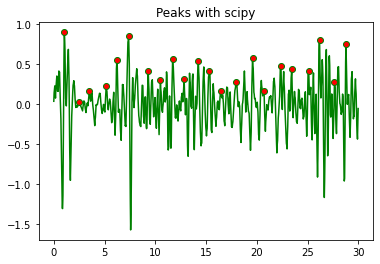

Peaks vector with scipy: [ 31  75 105 155 187 221 279 315 351 385 427 459 493 539 587 621 671 703
 753 785 829 863] num of peaks: 22


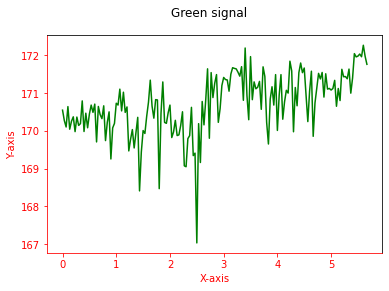

Peaks vector by implemented function: [0.56666667 1.63333333 2.7        3.7        4.43333333 5.56666667] num of peaks: 6


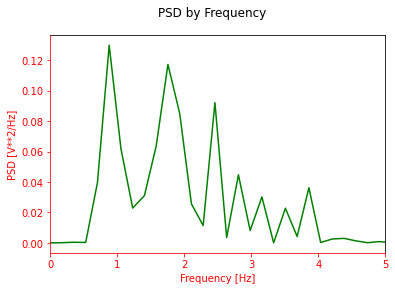

[2021-05-10 06:19:07,451] [INFO] [find_hr_in_window] [147] : Window 1:
Highest freq:0.8771929824561403
Heart rate: 52.63157894736842


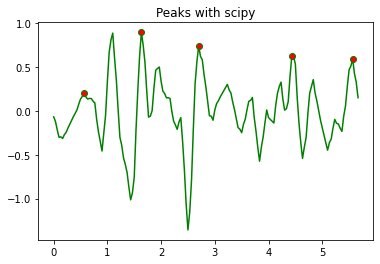

Peaks vector with scipy: [ 17  49  81 133 167] num of peaks: 5


In [101]:
# Parsing video:
for video_location in rotated_video_sources:
    color_sig = []
    heart_rates = []
    good_frame_number = 0
    total_frame_number = 180
    logging.info("Working on video " + video_location)
    vidcap = cv2.VideoCapture(video_location)
    success, image = vidcap.read()
    fps = vidcap.get(cv2.CAP_PROP_FPS) # fs == sampling rate
    round_fps = np.round(fps)
    number_of_frames = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)
    logging.info("Parsing images ...")
    skipped_frames = 0
    bad_frames = 0
    max_luminance = 0
    min_luminance = 200
    avg_luminance = 0
    perv_luminance = None
    max_diff_luminance_adjacent = 0

    while success:
        if skipped_frames < 180:
            skipped_frames += 1
            success, image = get_new_frame(vidcap)
            continue
        if total_frame_number % 100 == 0:
            logging.info("Parsing frame " + str(total_frame_number) + "/" + str(number_of_frames))
        rois = parse_roi(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # build image ROI (rois is a tuple contains two regions)
        if rois is not None :
            roi = np.asarray(rois[0]) # Just the forehead
            #roi = np.concatenate(rois)
            try:
                is_good_frame,color_sig, luminance_level = parse_RGB(roi, color_sig)
                if perv_luminance is not None and luminance_level - perv_luminance > max_diff_luminance_adjacent:
                    max_diff_luminance_adjacent = luminance_level - perv_luminance
                if luminance_level > max_luminance:
                    max_luminance = luminance_level
                if luminance_level < min_luminance:
                    min_luminance = luminance_level
                avg_luminance += luminance_level
                perv_luminance = luminance_level
            except:
                logging.error("failed to get output from parse_RGB!")
                is_good_frame = False
                bad_frames += 1
            if is_good_frame:
                good_frame_number += 1
                #logging.info("luminance level: " + str(luminance_level))
        if rois is None:
            bad_frames += 1
        total_frame_number += 1
        success, image = get_new_frame(vidcap)
    avg_luminance /= total_frame_number
    log_video_details(video_location)
    try:
        detect_hr(video_location)
    except:
        logging.warning("Issue in detecting hr in video")

